In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import qutip as qt
plt.style.use(['science', 'ieee'])
plt.style.use('science')
qt.settings.auto_tidyup = True
import os

In [2]:
import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [4]:
times = np.linspace(0, 0.02, 100)

In [6]:
def single_mode_solver_modified(method, dims, alpha_in, gamma_1, gamma_2, gamma_3, times=np.linspace(0, 0.02, 100)):
    
    # parameters
    omega = 0
    ntraj = 500
    
    # input state
    psi0 = qt.coherent(dims, alpha_in, method="analytic")
    
    # defining operators
    a = qt.destroy(dims)
    ad = a.dag()
    n = qt.num(dims)
    
    # collapse operators
    c_op_list = [np.sqrt(gamma_1) * a, np.sqrt(gamma_2) * a * a, np.sqrt(gamma_3) * a * (n-1)]
    
    # Hamiltonian
    H = omega * ad * a
    
    if method == "me":
        rho0 = qt.ket2dm(psi0)
        e_op_list = []
        return qt.mesolve(H, rho0, times, c_op_list, e_op_list).states
    elif method == "mc":
        e_op_list = [n, n**2]
        return qt.mcsolve(H, psi0, times, c_op_list, e_op_list, ntraj=ntraj)

In [7]:
def mandelQ(expectin): 
    """
    Input: output of single_mode_solver (or single_mode_solver_modified)
    Output: mandel Q parameter at each timestep
    """
    
    _num = expectin.expect[1] - expectin.expect[0]**2
    _denom = expectin.expect[0]
    
    return (_num/_denom)-1

In [8]:
def param2gamma2(U, Gamma, gamma_1):
    gamma_2 = (U**2)/(16 * (Gamma + gamma_1))
    return gamma_2

def param2gamma3(U, Gamma, gamma_1):
    gamma_3 = (U**2)/(4 * (Gamma + gamma_1))
    return gamma_3

gamma_2_test = param2gamma2(2.0, 432, 0)
gamma_3_test = param2gamma3(2.0, 430, 0)

In [9]:
sol100_modified = single_mode_solver_modified("mc", 140, 10, 0.0, gamma_2_test, gamma_3_test)
sol300_modified = single_mode_solver_modified("mc", 364, np.sqrt(300), 0.0, gamma_2_test, gamma_3_test)
sol500_modified = single_mode_solver_modified("mc", 581, np.sqrt(500), 0.0, gamma_2_test, gamma_3_test)
sol700_modified = single_mode_solver_modified("mc", 794, np.sqrt(700), 0.0, gamma_2_test, gamma_3_test)

10.0%. Run time:   6.51s. Est. time left: 00:00:00:58
20.0%. Run time:   8.08s. Est. time left: 00:00:00:32
30.0%. Run time:   9.47s. Est. time left: 00:00:00:22
40.0%. Run time:  11.16s. Est. time left: 00:00:00:16
50.0%. Run time:  12.67s. Est. time left: 00:00:00:12
60.0%. Run time:  14.03s. Est. time left: 00:00:00:09
70.0%. Run time:  15.09s. Est. time left: 00:00:00:06
80.0%. Run time:  16.55s. Est. time left: 00:00:00:04
90.0%. Run time:  18.12s. Est. time left: 00:00:00:02
100.0%. Run time:  19.37s. Est. time left: 00:00:00:00
Total run time:  19.54s
10.0%. Run time:  14.80s. Est. time left: 00:00:02:13
20.0%. Run time:  23.63s. Est. time left: 00:00:01:34
30.0%. Run time:  33.43s. Est. time left: 00:00:01:18
40.0%. Run time:  44.09s. Est. time left: 00:00:01:06
50.0%. Run time:  54.09s. Est. time left: 00:00:00:54
60.0%. Run time:  68.45s. Est. time left: 00:00:00:45
70.0%. Run time:  83.95s. Est. time left: 00:00:00:35
80.0%. Run time:  93.12s. Est. time left: 00:00:00:23
90.

In [10]:
sol100 = single_mode_solver_modified("me", 140, 10, 0.0, gamma_2_test, gamma_3_test)
sol300 = single_mode_solver_modified("me", 364, np.sqrt(300), 0.0, gamma_2_test, gamma_3_test)
sol500 = single_mode_solver_modified("me", 581, np.sqrt(500), 0.0, gamma_2_test, gamma_3_test)
sol700 = single_mode_solver_modified("me", 794, np.sqrt(700), 0.0, gamma_2_test, gamma_3_test)

In [13]:
qt.expect(qt.num(140), sol100)

array([99.98696661, 99.51373645, 99.04738393, 98.58773998, 98.13464082,
       97.68792836, 97.24744993, 96.81305808, 96.38461029, 95.96196878,
       95.54500032, 95.13357602, 94.72757115, 94.32686496, 93.93134051,
       93.54088452, 93.15538725, 92.77474228, 92.39884647, 92.02759978,
       91.66090514, 91.29866834, 90.94079795, 90.58720518, 90.23780382,
       89.89251009, 89.5512426 , 89.21392223, 88.88047207, 88.5508173 ,
       88.22488518, 87.90260492, 87.58390763, 87.26872627, 86.95699556,
       86.64865194, 86.3436335 , 86.04187991, 85.74333242, 85.44793374,
       85.15562804, 84.86636089, 84.5800792 , 84.29673119, 84.01626636,
       83.73863542, 83.46379027, 83.19168397, 82.92227069, 82.65550568,
       82.39134524, 82.12974668, 81.8706683 , 81.61406937, 81.35991005,
       81.10815145, 80.85875551, 80.61168505, 80.36690369, 80.12437587,
       79.8840668 , 79.64594245, 79.40996952, 79.17611543, 78.94434827,
       78.71463685, 78.4869506 , 78.2612596 , 78.03753456, 77.81

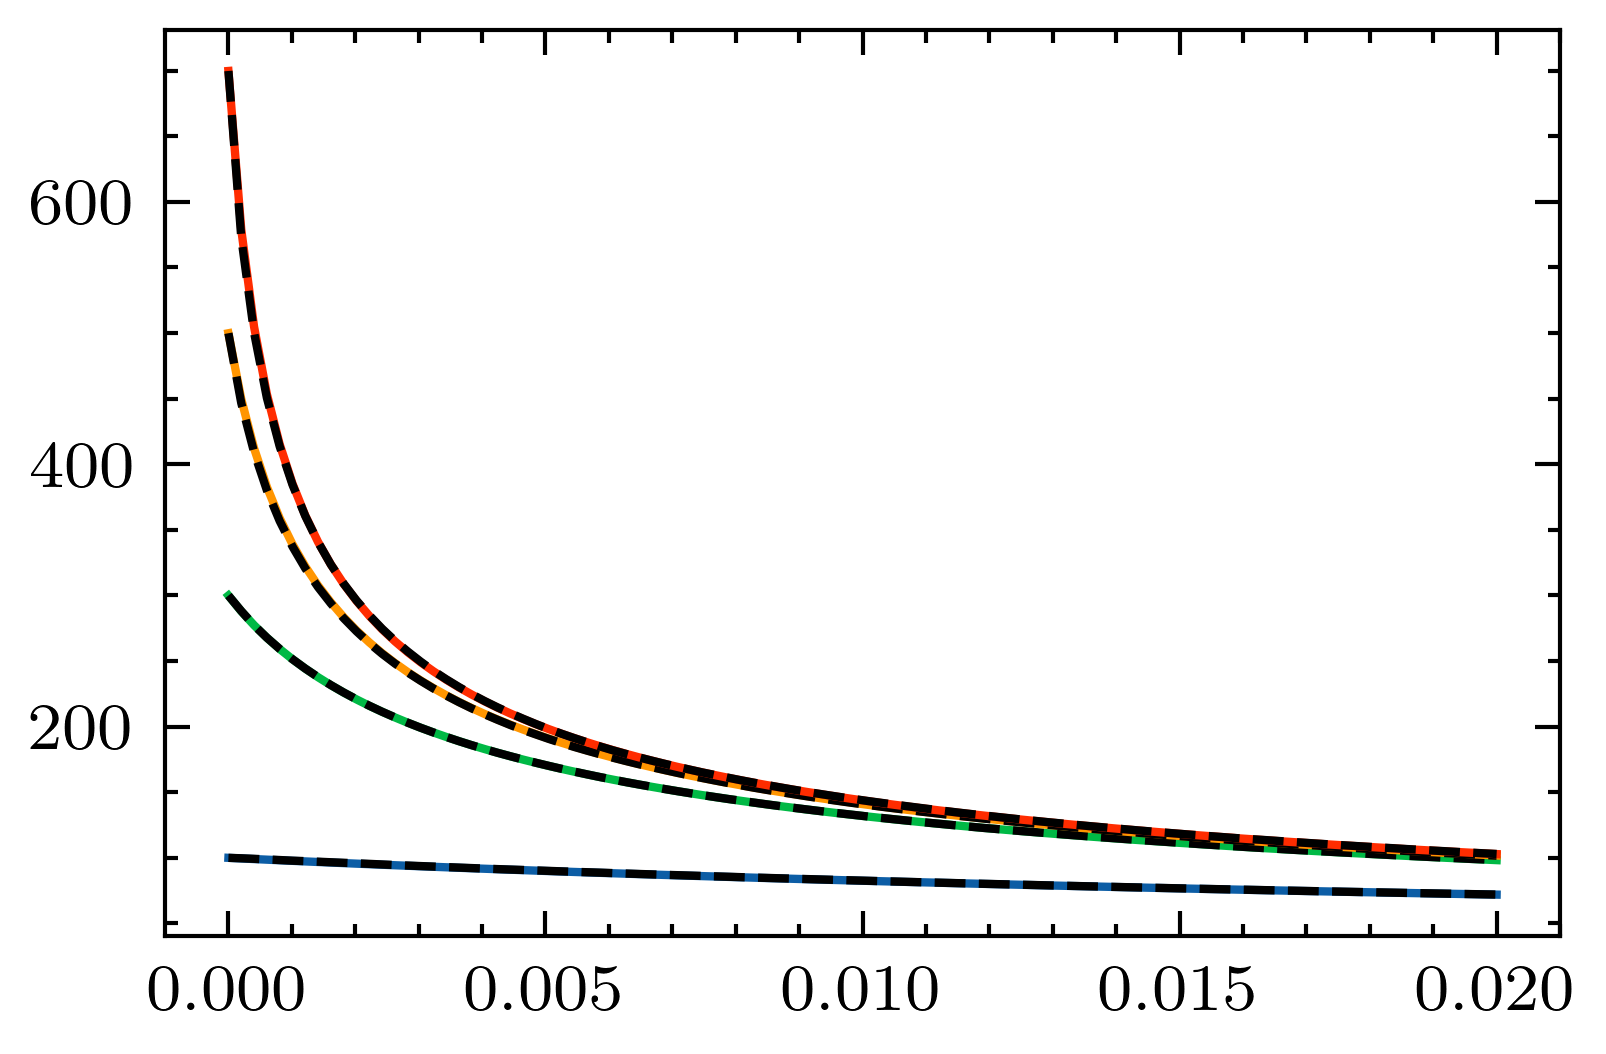

In [17]:
fig, ax = plt.subplots(figsize=(3, 2))

ax.plot(times, qt.expect(qt.num(140), sol100))
ax.plot(times, sol100_modified.expect[0], linestyle="--", color="black")

ax.plot(times, qt.expect(qt.num(364), sol300))
ax.plot(times, sol300_modified.expect[0], linestyle="--", color="black")

ax.plot(times, qt.expect(qt.num(581), sol500))
ax.plot(times, sol500_modified.expect[0], linestyle="--", color="black")

ax.plot(times, qt.expect(qt.num(794), sol700))
ax.plot(times, sol700_modified.expect[0], linestyle="--", color="black")



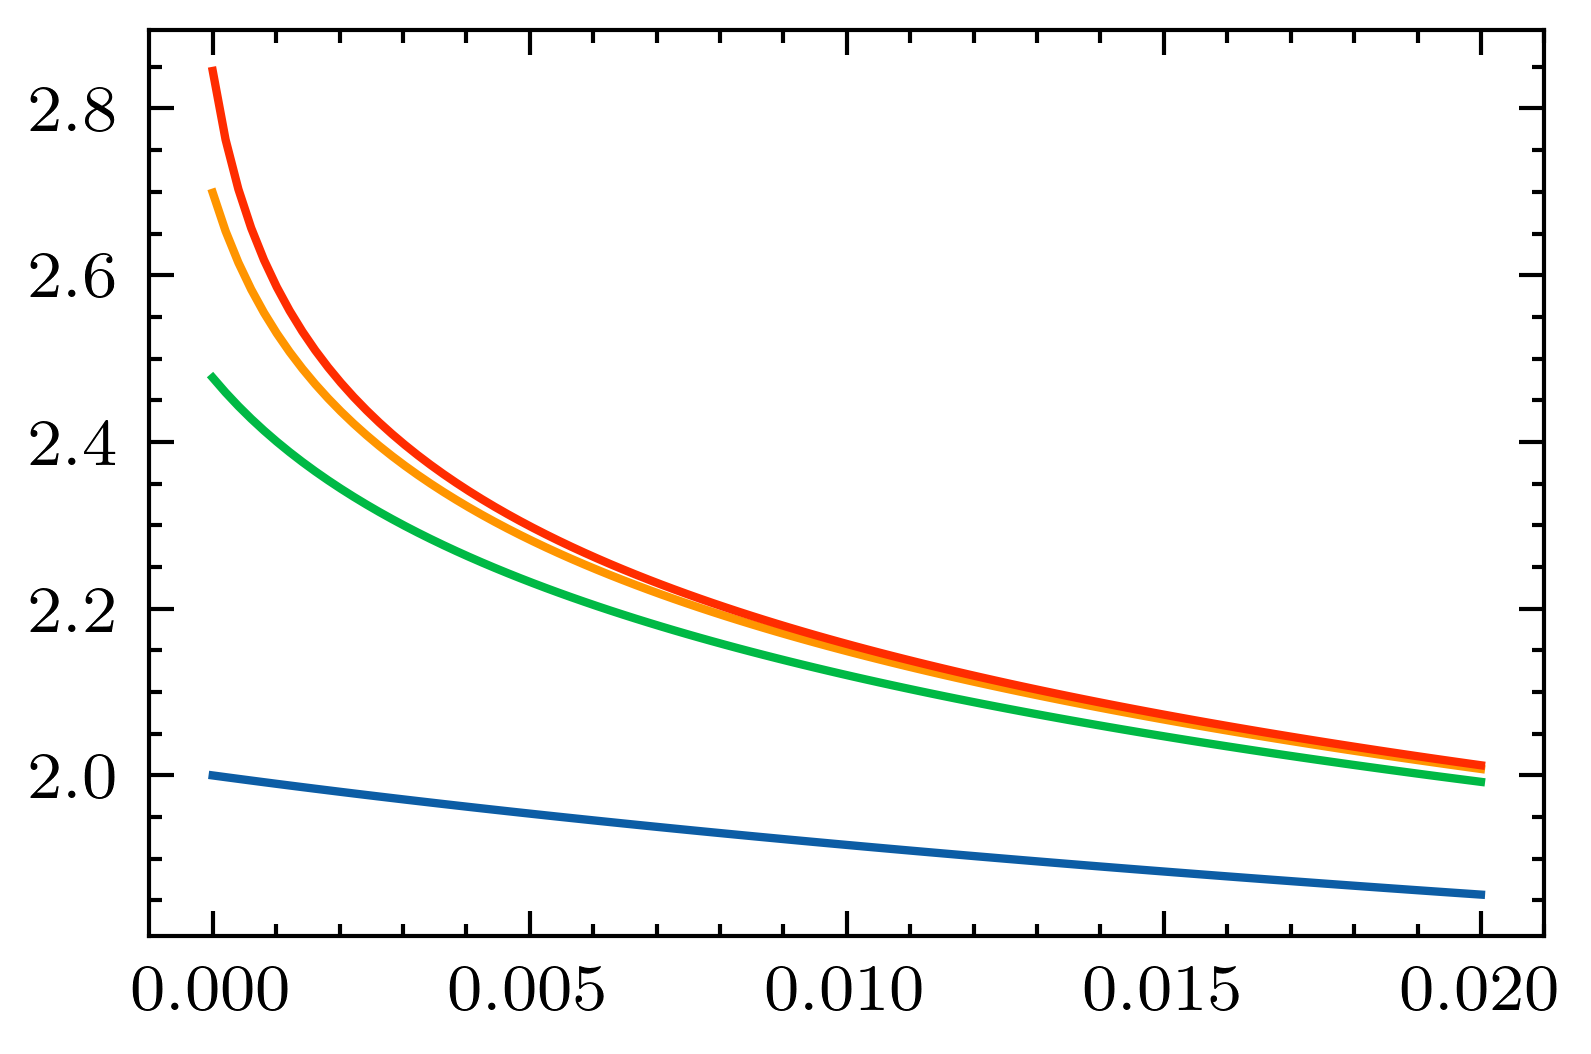

In [18]:
fig, ax = plt.subplots(figsize=(3, 2))

ax.plot(times, np.log10(qt.expect(qt.num(140), sol100)))
# ax.plot(times, sol100_modified.expect[0], linestyle="--", color="black")

ax.plot(times, np.log10(qt.expect(qt.num(364), sol300)))
# ax.plot(times, sol300_modified.expect[0], linestyle="--", color="black")

ax.plot(times, np.log10(qt.expect(qt.num(581), sol500)))
# ax.plot(times, sol500_modified.expect[0], linestyle="--", color="black")

ax.plot(times, np.log10(qt.expect(qt.num(794), sol700)))
# ax.plot(times, sol700_modified.expect[0], linestyle="--", color="black")



Yes, it is non-exponential.

In [20]:
gamma_2_test = 0.0
gamma_3_test = 0.0
gamma_1_test = 10.0
sol100_modified = single_mode_solver_modified("mc", 140, 10, gamma_1_test, gamma_2_test, gamma_3_test)
sol300_modified = single_mode_solver_modified("mc", 364, np.sqrt(300), gamma_1_test, gamma_2_test, gamma_3_test)
sol500_modified = single_mode_solver_modified("mc", 581, np.sqrt(500), gamma_1_test, gamma_2_test, gamma_3_test)
sol700_modified = single_mode_solver_modified("mc", 794, np.sqrt(700), gamma_1_test, gamma_2_test, gamma_3_test)

10.0%. Run time:   5.53s. Est. time left: 00:00:00:49
20.0%. Run time:   6.26s. Est. time left: 00:00:00:25
30.0%. Run time:   6.94s. Est. time left: 00:00:00:16
40.0%. Run time:   7.60s. Est. time left: 00:00:00:11
50.0%. Run time:   8.26s. Est. time left: 00:00:00:08
60.0%. Run time:   8.98s. Est. time left: 00:00:00:05
70.0%. Run time:   9.66s. Est. time left: 00:00:00:04
80.0%. Run time:  10.33s. Est. time left: 00:00:00:02
90.0%. Run time:  11.03s. Est. time left: 00:00:00:01
100.0%. Run time:  11.71s. Est. time left: 00:00:00:00
Total run time:  11.84s
10.0%. Run time:   6.34s. Est. time left: 00:00:00:57
20.0%. Run time:   8.58s. Est. time left: 00:00:00:34
30.0%. Run time:  10.85s. Est. time left: 00:00:00:25
40.0%. Run time:  13.04s. Est. time left: 00:00:00:19
50.0%. Run time:  15.23s. Est. time left: 00:00:00:15
60.0%. Run time:  17.47s. Est. time left: 00:00:00:11
70.0%. Run time:  19.64s. Est. time left: 00:00:00:08
80.0%. Run time:  21.89s. Est. time left: 00:00:00:05
90.

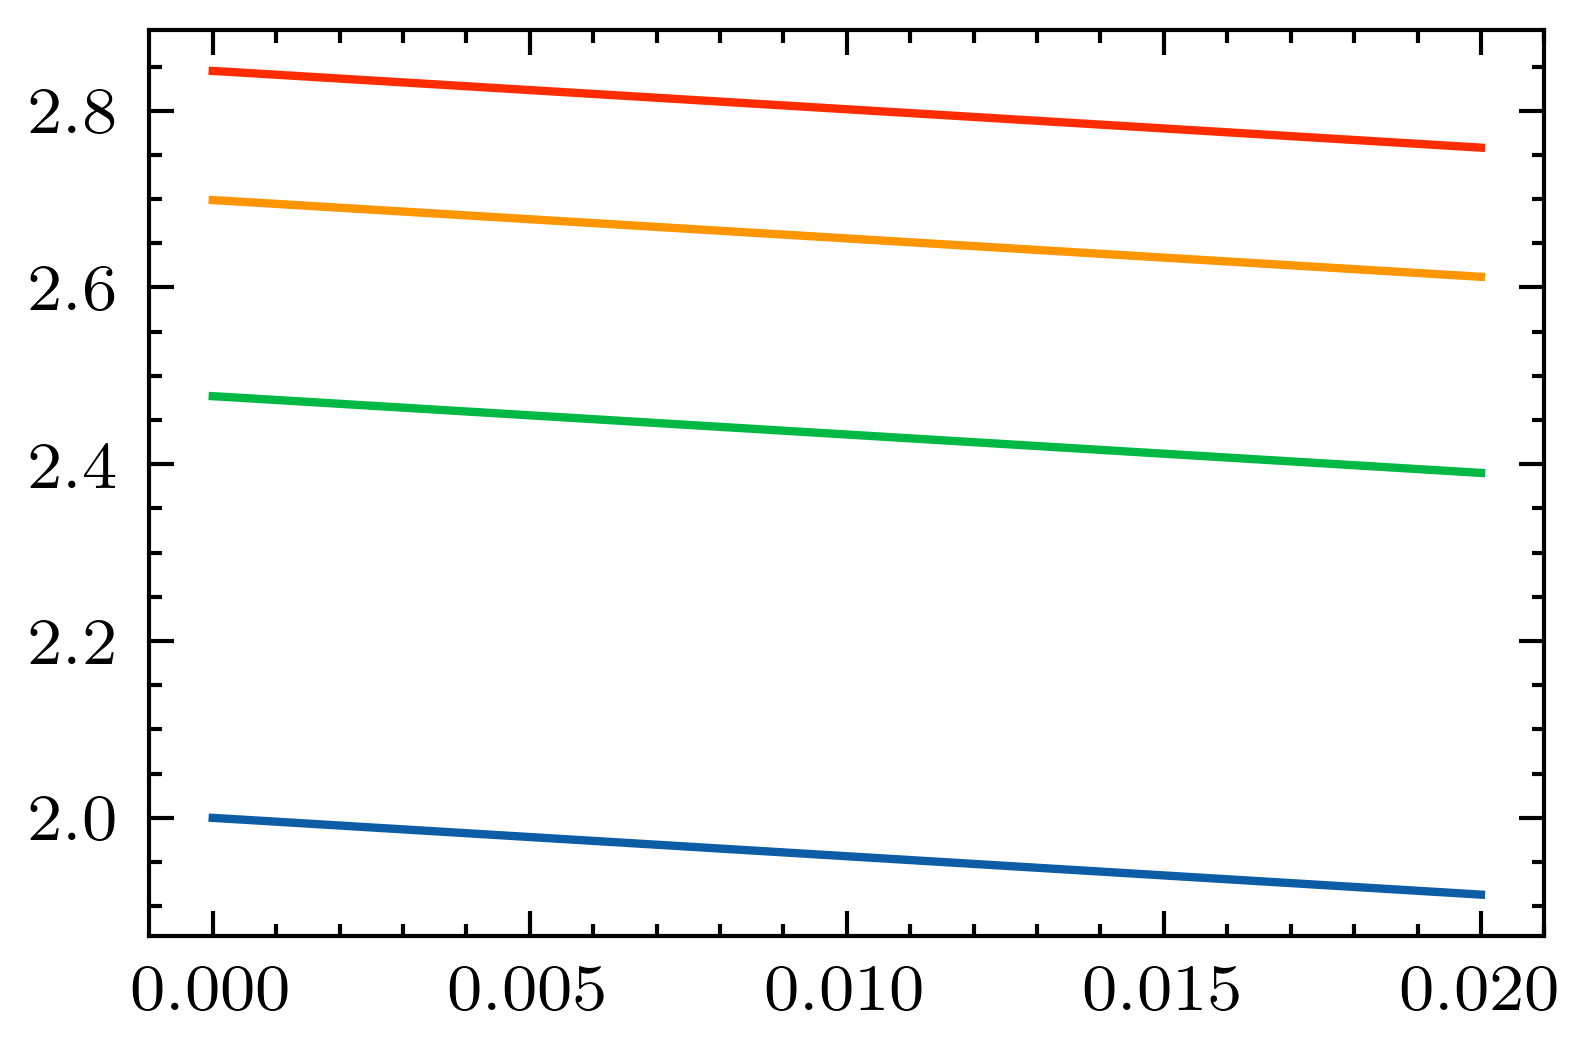

In [23]:
fig, ax = plt.subplots(figsize=(3, 2))

ax.plot(times, np.log10(sol100_modified.expect[0]))
ax.plot(times, np.log10(sol300_modified.expect[0]))
ax.plot(times, np.log10(sol500_modified.expect[0]))
ax.plot(times, np.log10(sol700_modified.expect[0]))



